In [ ]:
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Программы партий были предобработаны. Результат этого - папка с файлами вида "партия.txt", в каждом из которых написаны через пробел все слова-токены для соответствующей партии(они нормализованы и т.д.). Теперь будет создаваться мешок слов из программ партий.

# Создание датасетов

Делаем лист из текстов партий.

In [ ]:
input_dir = "/content/drive/MyDrive/Colab Notebooks/Проект/preprocess_parties"
party_names_txt = os.listdir(input_dir)
texts_for_vectorize = []
for i in party_names_txt:
  words = open(os.path.join(input_dir,i)).read() 
  texts_for_vectorize.append(words)

Делаем мешок слов.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts_for_vectorize)
print(vectorizer.get_feature_names())
print(X.toarray())

['covid', 'data', 'industrial', 'policies', 'price', 'publica', 'абитуриент', 'аборт', 'абсолют', 'абсолютизация', 'абсолютно', 'абсолютный', 'абстрактный', 'абсурд', 'абхазия', 'авангард', 'авангардный', 'авансцена', 'авантюра', 'авантюризм', 'аварийность', 'аварийный', 'авария', 'август', 'авиакосмический', 'авиалесоохрана', 'авиастроение', 'авиационный', 'авиация', 'автобус', 'автовладелец', 'автовокзал', 'автодорога', 'автоинспекция', 'авток', 'автократия', 'автомага', 'автомагистраль', 'автомат', 'автоматизация', 'автоматизированность', 'автоматизированный', 'автоматически', 'автоматический', 'автомашина', 'автомо', 'автомобилист', 'автомобиль', 'автомобильный', 'автономия', 'автономный', 'автопарк', 'автопилот', 'автор', 'авторитарный', 'авторитет', 'авторитетный', 'автостоянка', 'автострада', 'автотранспорт', 'агент', 'агентство', 'агитационный', 'агитация', 'агитировать', 'агломерация', 'агония', 'аграрий', 'аграрный', 'агрессивный', 'агрессия', 'агрессор', 'агробиологический',

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Делаем датасет.

In [ ]:
import pandas as pd
party_names = [i.replace(".txt","").replace('й','й') for i in party_names_txt]

data_count = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names(), index=party_names)
data_count

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,covid,data,industrial,policies,price,publica,абитуриент,аборт,абсолют,абсолютизация,абсолютно,абсолютный,абстрактный,абсурд,абхазия,авангард,авангардный,авансцена,авантюра,авантюризм,аварийность,аварийный,авария,август,авиакосмический,авиалесоохрана,авиастроение,авиационный,авиация,автобус,автовладелец,автовокзал,автодорога,автоинспекция,авток,автократия,автомага,автомагистраль,автомат,автоматизация,...,эффективный,эшелон,южный,юноша,юношеский,юный,юридически,юридический,юрисдикция,юрист,юрлица,ющей,яблоко,явка,явление,являться,явно,явный,ягода,ядерный,ядовитый,ядохимикат,ядро,язва,язык,языковой,языцех,январь,япония,японский,яркий,ярко,ярмарка,ярый,ясли,ясно,ясный,яхта,ячейка,ящик
Партия прямой демократии,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Партия социальной защиты,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
Партия прогресса,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Демократическая партия россии,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Партия пенсионеров,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,14,0,0,0,0,0,0,3,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
Российский общенародный союз,0,0,0,0,0,0,0,0,0,1,2,4,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7,0,2,1,0,0,0,1,0,0,0,0,0,0,4,21,0,1,0,0,0,0,2,0,1,0,0,0,1,0,1,0,0,0,0,0,2,1,0,0
Партия дела,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Зеленые,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
Единая россия,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,3,3,3,0,1,0,0,0,0,0,0,0,0,...,16,0,0,0,0,1,0,3,0,0,0,0,0,0,0,2,1,0,0,2,0,0,0,0,4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
ПМБР,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,7,0,0,0,0,0,0,3,0,0,0,0,0,1,0,11,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Создаем аналогичные датасеты для tf и tf-idf.

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=False)
tfidf_transformer = TfidfTransformer()
X_tf = tf_transformer.fit_transform(X)
X_tf_idf = tfidf_transformer.fit_transform(X)
data_tf = pd.DataFrame(X_tf.toarray(),columns=vectorizer.get_feature_names(), index=party_names)
data_tf_idf = pd.DataFrame(X_tf_idf.toarray(),columns=vectorizer.get_feature_names(), index=party_names)
data_tf

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,covid,data,industrial,policies,price,publica,абитуриент,аборт,абсолют,абсолютизация,абсолютно,абсолютный,абстрактный,абсурд,абхазия,авангард,авангардный,авансцена,авантюра,авантюризм,аварийность,аварийный,авария,август,авиакосмический,авиалесоохрана,авиастроение,авиационный,авиация,автобус,автовладелец,автовокзал,автодорога,автоинспекция,авток,автократия,автомага,автомагистраль,автомат,автоматизация,...,эффективный,эшелон,южный,юноша,юношеский,юный,юридически,юридический,юрисдикция,юрист,юрлица,ющей,яблоко,явка,явление,являться,явно,явный,ягода,ядерный,ядовитый,ядохимикат,ядро,язва,язык,языковой,языцех,январь,япония,японский,яркий,ярко,ярмарка,ярый,ясли,ясно,ясный,яхта,ячейка,ящик
Партия прямой демократии,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021072,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.042145,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Партия социальной защиты,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.036811,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.036811,0.000000,0.000000,0.000000,0.000000,0.000000
Партия прогресса,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Демократическая партия россии,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Партия пенсионеров,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004477,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004477,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [ ]:
data_tf_idf

,covid,data,industrial,policies,price,publica,абитуриент,аборт,абсолют,абсолютизация,абсолютно,абсолютный,абстрактный,абсурд,абхазия,авангард,авангардный,авансцена,авантюра,авантюризм,аварийность,аварийный,авария,август,авиакосмический,авиалесоохрана,авиастроение,авиационный,авиация,автобус,автовладелец,автовокзал,автодорога,автоинспекция,авток,автократия,автомага,автомагистраль,автомат,автоматизация,...,эффективный,эшелон,южный,юноша,юношеский,юный,юридически,юридический,юрисдикция,юрист,юрлица,ющей,яблоко,явка,явление,являться,явно,явный,ягода,ядерный,ядовитый,ядохимикат,ядро,язва,язык,языковой,языцех,январь,япония,японский,яркий,ярко,ярмарка,ярый,ясли,ясно,ясный,яхта,ячейка,ящик
Партия прямой демократии,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028470,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.034187,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Партия социальной защиты,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.068338,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083881,0.000000,0.000000,0.000000,0.000000,0.000000
Партия прогресса,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Демократическая партия россии,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Партия пенсионеров,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006998,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010435,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000

Сохраняем датасеты.

In [ ]:
data_count.to_csv('drive/MyDrive/Colab Notebooks/Проект/Датасеты/Партии/Итоговый count.csv')
data_tf.to_csv('drive/MyDrive/Colab Notebooks/Проект/Датасеты/Партии/Итоговый tf.csv')
data_tf_idf.to_csv('drive/MyDrive/Colab Notebooks/Проект/Датасеты/Партии/Итоговый tf-idf.csv')

#Кластеризация

##K-means

Проводим кластеризацию. Пробуем различное число кластеров.

In [ ]:
from sklearn import cluster
km = cluster.KMeans()
one_to_features_num = [i+1 for i in range(data_count.shape[0])]
inertia = []
for i in one_to_features_num:
  km.set_params(n_clusters = i,n_init = 100)
  km.fit(data_count)
  inertia.append(km.inertia_)

Строим график зависимости inertia от числа кластеров. 

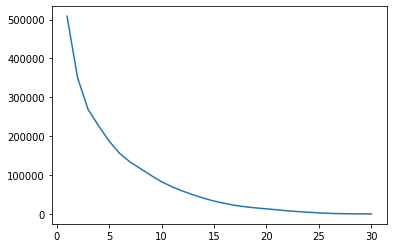

In [ ]:
import matplotlib
from matplotlib import pyplot as plt
plt.plot(one_to_features_num,inertia)

Проводим аналогичные действия для tf.

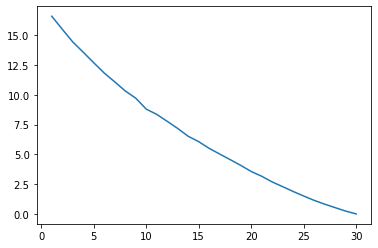

In [ ]:
inertia = []
for i in one_to_features_num:
  km.set_params(n_clusters = i,n_init = 100)
  km.fit(data_tf)
  inertia.append(km.inertia_)
plt.plot(one_to_features_num,inertia)

И теперь с td-idf.

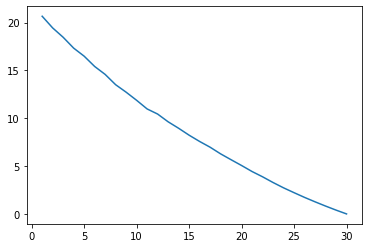

In [ ]:
inertia = []
for i in one_to_features_num:
  km.set_params(n_clusters = i,n_init = 100)
  km.fit(data_tf_idf)
  inertia.append(km.inertia_)
plt.plot(one_to_features_num,inertia)

Во всех случаях нет ярко выраженных локтей. Другие методы подбора подходящего значения k тут не работают, так как для любых 2 партий сложно определить, должны ли они попасть в один кластер, так как о них обычно ничего не известно.

## Иерархическая кластеризация

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import numpy as np
ac = AgglomerativeClustering(distance_threshold=0,n_clusters=None)

Делаем функцию для удобного вывода дендрограммы (https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py).

In [ ]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

## Иерархическая кластеризация

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
ac = AgglomerativeClustering(distance_threshold=0,n_clusters=None)

Делаем функцию для удобного вывода дендрограммы (https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py).

In [ ]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

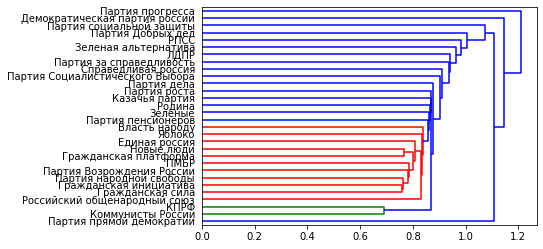

In [ ]:
plot_dendrogram(ac.set_params(linkage='single').fit(data_tf),labels=data_count.index,orientation='right')

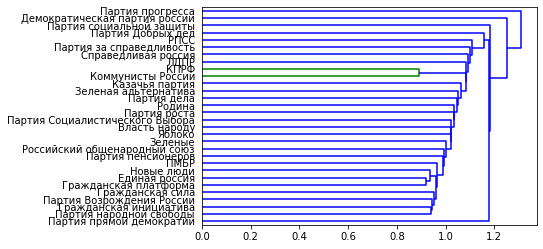

In [ ]:
plot_dendrogram(ac.set_params(linkage='single').fit(data_tf_idf),labels=data_count.index,orientation='right')

Образуется 1 большой кластер, к которому постепенно присоединяются все партии, это явно не то, что хочется видеть.

Теперь average

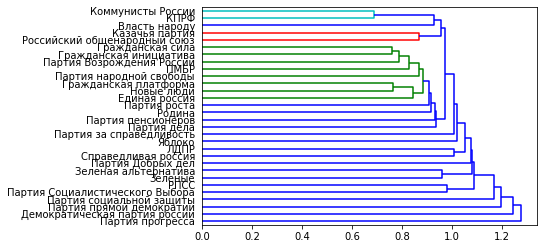

In [ ]:
plot_dendrogram(ac.set_params(linkage='average').fit(data_tf),labels=data_count.index,orientation='right')

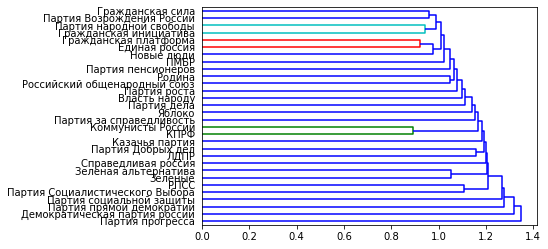

In [ ]:
plot_dendrogram(ac.set_params(linkage='average').fit(data_tf_idf),labels=data_count.index,orientation='right')

Та же самая проблема.

Теперь complete

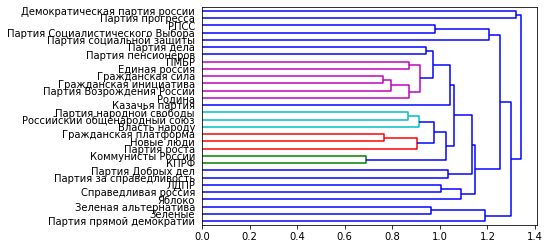

In [ ]:
plot_dendrogram(ac.set_params(linkage='complete').fit(data_tf),labels=data_count.index,orientation='right')

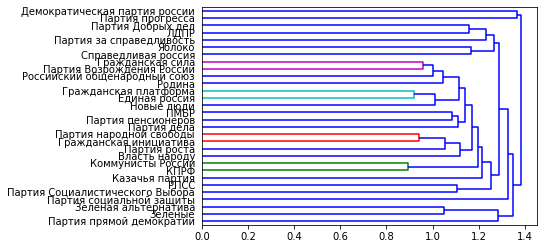

In [ ]:
plot_dendrogram(ac.set_params(linkage='complete').fit(data_tf_idf),labels=data_count.index,orientation='right')

Теперь ward.

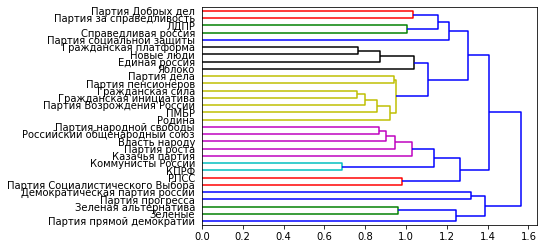

In [ ]:
plot_dendrogram(ac.set_params(linkage='ward').fit(data_tf),labels=data_count.index,orientation='right')

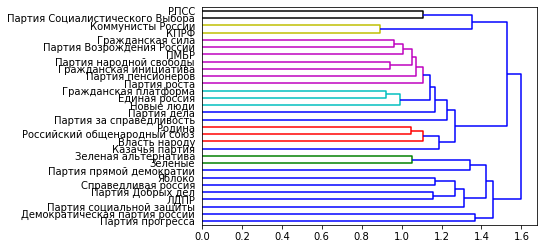

In [ ]:
plot_dendrogram(ac.set_params(linkage='ward').fit(data_tf_idf),labels=data_count.index,orientation='right')

Можно заметить партии, которые всегда или почти всегда соединяются первыми, и следовательно похожи. Это Коммунисты России и КПРФ, Зеленая альтернатива и Зеленые, Демократическая партия России и Партия прогресса, РПСС и Партия социалистического выбора, тройка (Единая Россия, Новые люди, Гражданская платформа), тройка (ЛДПР, Справедливая Россия, Партия добрых дел), четверка (Гражданская сила, Гражданская инициатива, ПМБР, Партия возрождения России). Не наблюдается никакой аналогии между названиями партий и их возможными кластерами.

# Классификация

## Подготовка меток

Классификация делается по попаданию и не попаданию в Госдуму.

У нас есть файл csv, где для каждой партии указано, попадает она в Госдуму или нет. Загружаем его.

In [ ]:
project_dir = "/content/drive/MyDrive/Colab Notebooks/Проект"
labels_path = "партия попала или нет2.csv"
labels = pd.read_csv(os.path.join(project_dir,labels_path),header=None)
labels

,0,1,2
0,1,Власть народу,0
1,2,Гражданская инициатива,0
2,3,Гражданская платформа,0
3,4,Зеленая альтернатива,0
4,5,Зеленые,0
5,6,Коммунисты России,0
6,7,КПРФ,1
7,8,ЛДПР,1
8,9,Новые люди,1
9,10,Партия Возрождения России,0


Теперь нужно изменить порядок партий, чтобы он был, как в таблице данных.

In [ ]:
labels2 = pd.DataFrame({'Попала':list(labels[2])},index=list(labels[1]))

In [ ]:
y = [labels2['Попала'][i] for i in data_count.index]
print(y)

[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
pd.DataFrame({'fdsd':y},index=data_count.index)

,fdsd
Партия прямой демократии,0
Партия социальной защиты,0
Партия прогресса,0
Демократическая партия россии,0
Партия пенсионеров,0
Российский общенародный союз,0
Партия дела,0
Зеленые,0
Единая россия,1
ПМБР,0


## K-neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Посмотрим параметры классификатора.

In [ ]:
KNeighborsClassifier().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

Делаем сетку параметров для подбора наилучших параметров.

In [ ]:
possible_metrics = ['euclidean','manhattan']
param_grid1 = {'n_neighbors':range(1,10),'weights':['uniform','distance'],'algorithm':['auto'],'n_jobs': [-1],'metric':possible_metrics,'p':[1]}
param_grid = [param_grid1]

In [ ]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(estimator = KNeighborsClassifier(),param_grid=param_grid,n_jobs = -1)
gs.fit(data_count,y)

GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'algorithm': ['auto'],
                          'metric': ['euclidean', 'manhattan'], 'n_jobs': [-1],
                          'n_neighbors': range(1, 10), 'p': [1],
                          'weights': ['uniform', 'distance']}])

Смотрим лучшие найденные параметры.

In [ ]:
gs.best_params_

{'algorithm': 'auto',
 'metric': 'euclidean',
 'n_jobs': -1,
 'n_neighbors': 2,
 'p': 1,
 'weights': 'uniform'}

Смотрим точность, полученную на лучших параметрах, в результате оценки с помощью кросс-валидации.

In [ ]:
gs.best_score_

0.8333333333333334

Получился классификатор, он работает с неплохой точностью.

In [ ]:
gs.best_estimator_.predict(data_count)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

Попробуем то же самое для tf и tf-idf

In [ ]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(estimator = KNeighborsClassifier(),param_grid=param_grid,n_jobs = -1)
gs.fit(data_tf,y)
print(gs.best_params_)
gs.best_score_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [0.73333333 0.73333333 0.8        0.73333333 0.76666667 0.76666667
 0.8        0.76666667 0.8        0.8        0.83333333 0.8
 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333
 0.8        0.8        0.83333333 0.8        0.83333333 0.83333333
 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333
 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333
 0.63333333 0.63333333 0.8        0.63333333 0.8        0.8
 0.83333333 0.73333333 0.83333333 0.83333333 0.83333333 0.83333333
 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333
 0.8        0.8        0.83333333 0.8        0.83333333 0.83333333
 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333
 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333
        nan        nan        nan        nan        nan        nan
    

{'algorithm': 'auto', 'metric': 'euclidean', 'n_jobs': -1, 'n_neighbors': 6, 'p': 1, 'weights': 'uniform'}


0.8333333333333334

In [ ]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(estimator = KNeighborsClassifier(),param_grid=param_grid,n_jobs = -1)
gs.fit(data_tf_idf,y)
print(gs.best_params_)
gs.best_score_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [0.8        0.8        0.76666667 0.8        0.8        0.8
 0.8        0.8        0.8        0.8        0.83333333 0.8
 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333
 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333
 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333
 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333
 0.73333333 0.73333333 0.8        0.73333333 0.73333333 0.73333333
 0.83333333 0.73333333 0.83333333 0.83333333 0.83333333 0.83333333
 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333
 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333
 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333
 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333
        nan        nan        nan        nan        nan        nan
    

{'algorithm': 'auto', 'metric': 'euclidean', 'n_jobs': -1, 'n_neighbors': 6, 'p': 1, 'weights': 'uniform'}


0.8333333333333334

## Наивный Баес

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

Строим модель и смотрим ее точность с помощью кросс валидации. 

In [ ]:
nb = GaussianNB()
cross_val_score(nb,data_count,y,cv=RepeatedKFold(n_splits=5,n_repeats=100)).mean()

0.8096666666666668

Теперь tf.

In [ ]:
nb = GaussianNB()
cross_val_score(nb,data_tf,y,cv=RepeatedKFold(n_splits=5,n_repeats=100)).mean()

0.8183333333333332

И tf-idf.

In [ ]:
nb = GaussianNB()
cross_val_score(nb,data_tf,y,cv=RepeatedKFold(n_splits=5,n_repeats=100)).mean()

0.8163333333333334

## Деревья решений

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from scipy.sparse import csc_matrix
from sklearn.model_selection import GridSearchCV
import numpy as np

Делаем сетку параметров для подбора наилучших, и делаем поиск по сетке, чтобы найти наилучший параметр. Перед fit делаем преобразование датасета в формат csc_matrix, чтобы fit делался быстрее.

In [ ]:
param_grid = [{'max_depth':range(1,10),'min_samples_split':range(2,10)}]
gs = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=param_grid,n_jobs=-1)
gs.fit(data_count,y)
print(gs.best_score_)
tree_params = gs.best_params_
tree_params

0.7666666666666667


{'max_depth': 2, 'min_samples_split': 7}

Строим получившееся дерево.

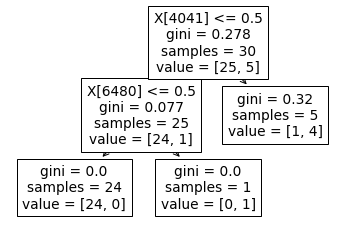

In [ ]:
from sklearn import tree
proba = tree.plot_tree(gs.best_estimator_)

value - Это распределение по классам примеров, которые попали в этот узел.

Посмотрим, что это за колонки, по значению которых принимается решение.

In [ ]:
print(data_count.columns[4041],data_count.columns[6480])

обновлять сбербанк


Итак, если в партии есть слово "обновлять", то она попадает в Госдуму с вероятностью 80%. Иначе она не попадает, за одним исключением: если у нее есть слово о сбербанке, то попадает.

Построим классификатор также для tf и tf-idf.

In [ ]:
param_grid = [{'max_depth':range(1,10),'min_samples_split':range(2,10)}]
gs = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=param_grid,n_jobs=-1)
gs.fit(data_tf,y)
print(gs.best_score_)
tree_params = gs.best_params_
tree_params

0.8


{'max_depth': 5, 'min_samples_split': 2}

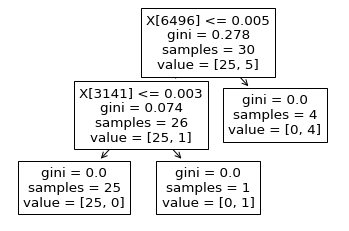

In [ ]:
from sklearn import tree
proba = tree.plot_tree(gs.best_estimator_)

In [ ]:
print(data_count.columns[6496],data_count.columns[3141])

свалка мелкобуржуазный


Дерево аналогично. Должна быть затронута тема свалок, но если нет, то должно быть хотя бы слово "мелкобуржуазный".

In [ ]:
param_grid = [{'max_depth':range(1,10),'min_samples_split':range(2,10)}]
gs = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=param_grid,n_jobs=-1)
gs.fit(data_tf_idf,y)
print(gs.best_score_)
tree_params = gs.best_params_
tree_params

0.8


{'max_depth': 3, 'min_samples_split': 4}

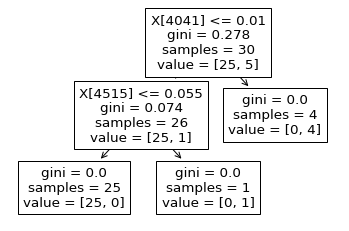

In [ ]:
from sklearn import tree
proba = tree.plot_tree(gs.best_estimator_)

In [ ]:
print(data_count.columns[4041],data_count.columns[4515])

обновлять отрасль


Тут, как в первом, только вместо "сбербанк" моделью было найдено другое слово, уникальное для той партии, которая не сказала слово "обновлять".

## SVM

In [ ]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

Строим модель методом опорных векторов для линейного ядра и оцениваем ее точность на кросс валидации.

In [ ]:
lin_svm = svm.LinearSVC()
print(cross_val_score(lin_svm,data_count,y).mean(),
      cross_val_score(lin_svm,data_tf,y).mean(),
      cross_val_score(lin_svm,data_tf_idf,y).mean())

0.8333333333333334 0.8333333333333334 0.8333333333333334


То же самое делаем для других ядер.

In [ ]:
svm_est = svm.SVC()
param_grid = [{'kernel':['polynomial','rbf','sigmoid']}]
gs = GridSearchCV(svm_est,param_grid=param_grid,n_jobs=-1)
gs.fit(data_count,y)
print('best score: ',gs.best_score_)
gs.best_params_

best score:  0.8333333333333334


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 333, in _dense_fit
    random_seed=random_seed,
  File "sklearn/svm/_libsvm.pyx", line 173

{'kernel': 'rbf'}

In [ ]:
svm_est = svm.SVC()
param_grid = [{'kernel':['polynomial','rbf','sigmoid']}]
gs = GridSearchCV(svm_est,param_grid=param_grid,n_jobs=-1)
gs.fit(data_tf,y)
print('best score: ',gs.best_score_)
gs.best_params_

best score:  0.8333333333333334


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 333, in _dense_fit
    random_seed=random_seed,
  File "sklearn/svm/_libsvm.pyx", line 173

{'kernel': 'rbf'}

In [ ]:
svm_est = svm.SVC()
param_grid = [{'kernel':['polynomial','rbf','sigmoid']}]
gs = GridSearchCV(svm_est,param_grid=param_grid,n_jobs=-1)
gs.fit(data_tf_idf,y)
print('best score: ',gs.best_score_)
gs.best_params_

best score:  0.8333333333333334


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 333, in _dense_fit
    random_seed=random_seed,
  File "sklearn/svm/_libsvm.pyx", line 173

{'kernel': 'rbf'}

# Оценка моделей

Сначала попробуем сделать разделение на тестовые и тренировочные наборы.

In [ ]:
from sklearn.model_selection import train_test_split
split = [train_test_split(i, y, test_size=0.2, random_state=4) for i in [data_count,data_tf,data_tf_idf]]
#X_train_count, X_test_count, y_train_count, y_test_count = train_test_split(data_count, y, test_size=0.2, random_state=2)
#X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(data_tf, y, test_size=0.2, random_state=2)
#X_train_tf_idf, X_test_tf_idf, y_train_tf_idf, y_test_tf_idf = train_test_split(data_tf_idf, y, test_size=0.2, random_state=2)

В результате поисков по сетке были определены лучшие параметры для классификаторов. Создадим все эти классификаторы, чтобы затем одновременно оценивать их точность.

In [ ]:
knn_count = KNeighborsClassifier(**{'algorithm': 'auto','metric': 'euclidean','n_jobs': -1,'n_neighbors': 2,'p': 1,'weights': 'uniform'})
knn_tf = KNeighborsClassifier(**{'algorithm': 'auto', 'metric': 'euclidean', 'n_jobs': -1, 'n_neighbors': 6, 'p': 1, 'weights': 'uniform'})
knn_tf_idf = KNeighborsClassifier(**{'algorithm': 'auto', 'metric': 'euclidean', 'n_jobs': -1, 'n_neighbors': 6, 'p': 1, 'weights': 'uniform'})

nb_count = GaussianNB()
nb_tf = GaussianNB()
nb_tf_idf = GaussianNB()

tree_count = DecisionTreeClassifier(max_depth=2,min_samples_split=7)
tree_tf = DecisionTreeClassifier(max_depth=5,min_samples_split=2)
tree_tf_idf = DecisionTreeClassifier(max_depth=3,min_samples_split=4)

svm_lin_count = svm.LinearSVC()
svm_lin_tf = svm.LinearSVC()
svm_lin_tf_idf = svm.LinearSVC()

svm_rbf_count = svm.SVC(kernel='rbf')
svm_rbf_tf = svm.SVC(kernel='rbf')
svm_rbf_tf_idf = svm.SVC(kernel='rbf')

classif_count = [knn_count,nb_count,tree_count,svm_lin_count,svm_rbf_count]
classif_tf = [knn_tf,nb_tf,tree_tf,svm_lin_tf,svm_rbf_tf]
classif_tf_idf = [knn_tf_idf,nb_tf_idf,tree_tf_idf,svm_lin_tf_idf,svm_rbf_tf_idf]
classif = [classif_count,classif_tf,classif_tf_idf]


Определим y_true и y_pred.

In [ ]:
y_pred = []
y_true = []
for i in range(len(classif)):
  for j in classif[i]:
    y_pred_tmp = j.fit(split[i][0],split[i][2]).predict(split[i][1])
    y_pred.append(y_pred_tmp)
    y_true.append(split[i][3])

In [ ]:
y_true

[[1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0]]

In [ ]:
y_pred

[array([0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0]),
 array([1, 0, 1, 0, 0, 1]),
 array([0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0]),
 array([0, 1, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0]),
 array([0, 0, 1, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0])]

Видно, что для такого маленького количества примеров train_test_split не подходит, удалось увидеть лишь 1 классификатор, который бы правильно предсказал попадание одной из партий в Госдуму. Поэтому нужно использовать кросс-валидацию.

По результатам видно, что большинство классификаторов совсем не стараются предсказать правильно партии, которые попали в Госдуму. Они по большей части выводят 0. Это следствие несбалансированности классов. Кроме того, это обьясняет то, что на всех классификаторах получилась примерно одинаковая точность - 0.83 - все они предсказывали по большей части лишь нули. Поэтому нужно использовать другую метрику для нахождения параметров классификатора.